# Toxicity

Analyse the toxicity of the politicians posts and measure the correlation with the likes of those posts

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#import data
df_toxicity = pd.read_csv("polArg_toxicity_full.csv")

In [ ]:
plt.style.use('seaborn-deep')

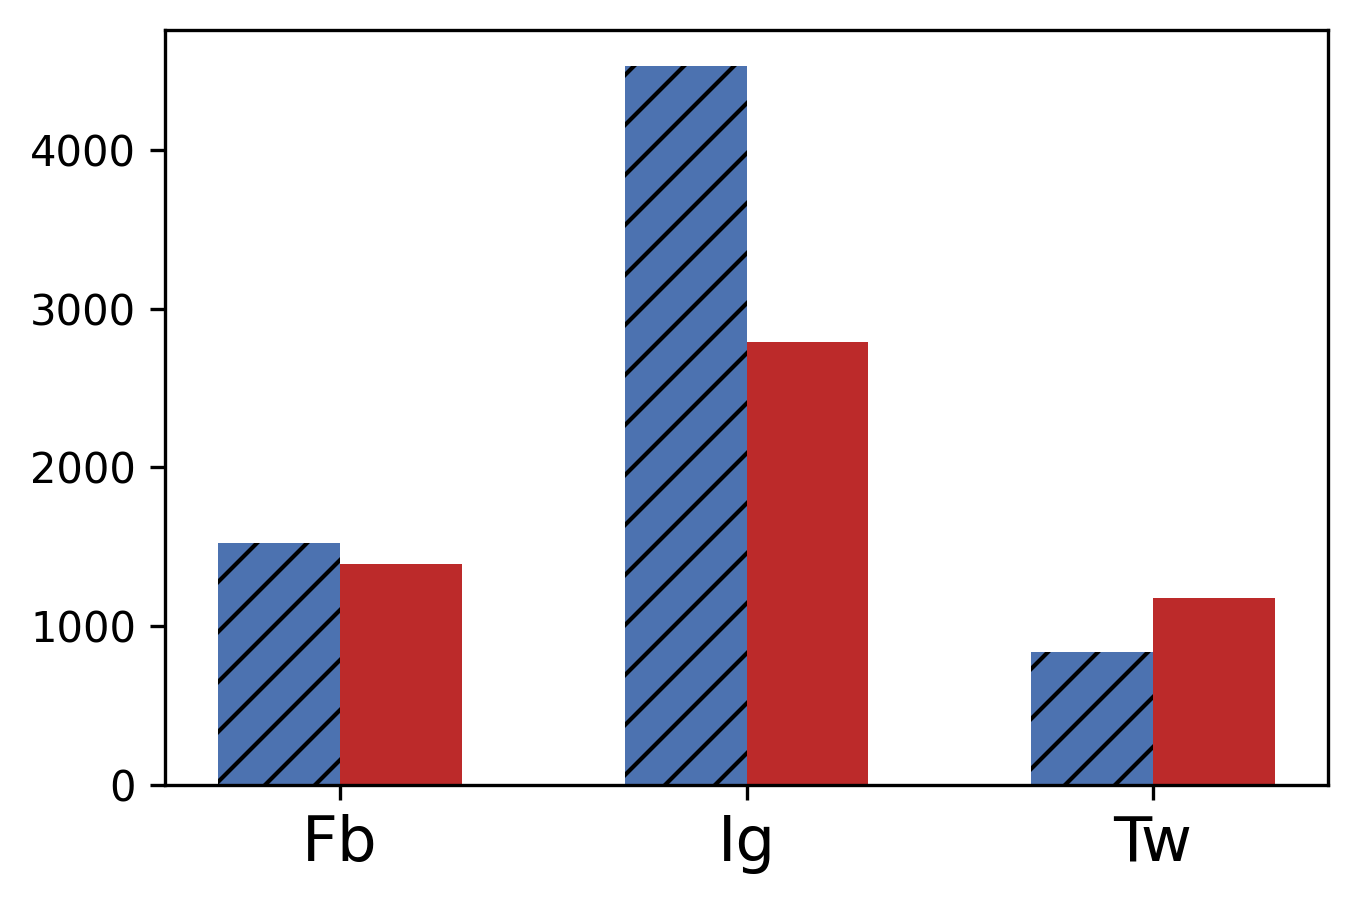

In [ ]:
#define toxicity treshold
p = 0.7

#make plot
labels = ['Fb', 'Ig', 'Tw']
x = np.arange(len(labels))
width = 0.3

plt.figure(figsize=(1500/300, 1000/300), dpi=300)
#plt.figure(figsize=(3, 3))
plt.bar(x-width/2, df_toxicity[df_toxicity.toxicity < p].groupby("red")['Likes'].mean().tolist(), 
             #yerr=df_toxicity[df_toxicity.toxicity < p].groupby("red")['Likes'].std().tolist(),
             width = width, label='no toxico (< p)', hatch='//')
plt.bar(x+width/2, df_toxicity[df_toxicity.toxicity > p].groupby("red")['Likes'].mean().tolist(), 
             #yerr=df_toxicity[df_toxicity.toxicity > p].groupby("red")['Likes'].std().tolist(),
             width = width, label='toxico (> p)', color="#BC2A2A")
plt.xticks([0,1,2], labels, fontsize=15)
#plt.title("probability treshold: {}".format(p))
plt.savefig('toxicity.jpg')

In [ ]:
#find correlations between toxicity and likes
for red in df_toxicity.red.unique():
    print(red)
    print(stats.spearmanr(df_toxicity[df_toxicity.red == red].Likes,
                          df_toxicity[df_toxicity.red == red].severe_toxicity))

ig
SpearmanrResult(correlation=-0.007790174581567056, pvalue=0.3981284288794572)
fb
SpearmanrResult(correlation=0.07949168270165503, pvalue=6.139549312735303e-24)
tw
SpearmanrResult(correlation=0.14845687561743093, pvalue=1.6705840704690797e-271)
